In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv(r"D:\PYTON PROGRAMMING\PYTHON FILES\MATPLOTLIB\PROJECTS\us-transport-trends\Data\Transportation_Services_Index_and_Seasonally-Adjusted_Transportation_Data.csv")

1. What are the column names, data types, and how many missing values are in each column?

In [ ]:
print(f" The collumns name of the data are :\n {df.columns}\n")
print(f"The data type of the collumns are :\n {df.dtypes}\n")
print(f"The total number of missing values in the data are : {df.isnull().sum().sum()}")

2. How many data entries were recorded in the year 2020?

In [26]:
df['year'] = pd.to_datetime(df['OBS_DATE'], format='mixed', errors='coerce').dt.year
data_2020 = df['year'].value_counts().get(2020, 0)
print(f"The number of data entries which were recorded in 2020 is {data_2020}")

The number of data entries which were recorded in 2020 is 12


3. What is the average AIR_RPM_TSI across all available months?

In [28]:
avg_trv_dis = df['AIR_RPM_TSI'].mean()
print(f"The average passenger travel distance (in revenue passenger miles) across all the time periods in the dataset is {avg_trv_dis:.2f}")

The average passenger travel distance (in revenue passenger miles) across all the time periods in the dataset is 69611107.82


4. Which month had the highest and lowest value of RAIL_FRT_CARLOADS?

In [8]:
df['Month'] = pd.to_datetime(df['OBS_DATE'], format='mixed', errors='coerce').dt.strftime('%B')
monthly_avg = df.groupby('Month')['AIR_RPM_TSI'].mean()
highest_RAIL_FRT_CARLOADS = monthly_avg.idxmax()
lowest_RAIL_FRT_CARLOADS = monthly_avg.idxmin()
print(f"The month with the highest average number of rail freight carloads is {highest_RAIL_FRT_CARLOADS} with an average of {monthly_avg[highest_RAIL_FRT_CARLOADS]:.2f}")
print(f"The month with lowest amoutn of rail freight carloads is {lowest_RAIL_FRT_CARLOADS} with an average of {monthly_avg[lowest_RAIL_FRT_CARLOADS]:.2f}")

The month with the highest average number of rail freight carloads is July with an average of 80933766.68
The month with lowest amoutn of rail freight carloads is February with an average of 58885227.23


5. Show all rows where the LOAD_FACTOR is greater than 85.

In [ ]:
LOAD_FACTOR_over_85 = df[df['LOAD_FACTOR'] > 85]
LOAD_FACTOR_over_85

##

## 🚚 Freight and Supply Chain Focus

6. Which transportation mode (rail, air, truck, etc.) showed the most highest growth over time?

In [37]:

temp_columns = [
    'AIR_RPM_TSI_pct', 'AIR_RPM_TSI_D11_pct', 'AIR_RTMFM_pct', 'AIR_RTMFM_D11_pct',
    'RAIL_FRT_CARLOADS_pct', 'RAIL_FRT_CARLOADS_D11_pct', 'RAIL_FRT_INTERMODAL_pct', 
    'RAIL_FRT_INTERMODAL_D11_pct', 'RAIL_PM_pct', 'RAIL_PM_D11_pct',
    'WATERBORNE_pct', 'WATERBORNE_D11_pct', 'TRUCK_D11_pct'
]

# Air-related columns
df['AIR_RPM_TSI_pct'] = df['AIR_RPM_TSI'].pct_change(fill_method=None)
df['AIR_RPM_TSI_D11_pct'] = df['AIR_RPM_TSI_D11'].pct_change(fill_method=None)
df['AIR_RTMFM_pct'] = df['AIR_RTMFM'].pct_change(fill_method=None)
df['AIR_RTMFM_D11_pct'] = df['AIR_RTMFM_D11'].pct_change(fill_method=None)

# Rail-related columns
df['RAIL_FRT_CARLOADS_pct'] = df['RAIL_FRT_CARLOADS'].pct_change(fill_method=None)
df['RAIL_FRT_CARLOADS_D11_pct'] = df['RAIL_FRT_CARLOADS_D11'].pct_change(fill_method=None)
df['RAIL_FRT_INTERMODAL_pct'] = df['RAIL_FRT_INTERMODAL'].pct_change(fill_method=None)
df['RAIL_FRT_INTERMODAL_D11_pct'] = df['RAIL_FRT_INTERMODAL_D11'].pct_change(fill_method=None)
df['RAIL_PM_pct'] = df['RAIL_PM'].pct_change(fill_method=None)
df['RAIL_PM_D11_pct'] = df['RAIL_PM_D11'].pct_change(fill_method=None)

# Waterborne and Truck columns
df['WATERBORNE_pct'] = df['WATERBORNE'].pct_change(fill_method=None)
df['WATERBORNE_D11_pct'] = df['WATERBORNE_D11'].pct_change(fill_method=None)
df['TRUCK_D11_pct'] = df['TRUCK_D11'].pct_change(fill_method=None)

# Sum air-related pct changes for each row
df['AIR_GROWTH'] = df[
    ['AIR_RPM_TSI_pct', 'AIR_RPM_TSI_D11_pct', 'AIR_RTMFM_pct', 'AIR_RTMFM_D11_pct']
].sum(axis=1)

# Sum rail-related pct changes for each row
df['RAIL_GROWTH'] = df[
    ['RAIL_FRT_CARLOADS_pct', 'RAIL_FRT_CARLOADS_D11_pct', 
     'RAIL_FRT_INTERMODAL_pct', 'RAIL_FRT_INTERMODAL_D11_pct',
     'RAIL_PM_pct', 'RAIL_PM_D11_pct']
].sum(axis=1)

# Sum waterborne and truck pct changes
df['WATERBORNE_GROWTH'] = df[['WATERBORNE_pct', 'WATERBORNE_D11_pct']].sum(axis=1)
df['TRUCK_GROWTH'] = df['TRUCK_D11_pct']

df.fillna(0, inplace=True)

growth_rate = {
    'Air': df['AIR_GROWTH'],
    'Waterborne': df['WATERBORNE_GROWTH'],
    'Rail': df['RAIL_GROWTH'],
    'Truck': df['TRUCK_GROWTH']
}

max_mode = max(growth_rate, key=lambda x: growth_rate[x].max())
# Suppose your growth rates are:

    # Air: [1.2, 1.5, 1.8] (max = 1.8)

    # Waterborne: [0.8, 1.1, 1.3] (max = 1.3)

    # Rail: [2.1, 1.9, 2.3] (max = 2.3)

    # Truck: [1.0, 1.2, 1.1] (max = 1.2)

    # The max() function compares:

            # 'Air': 1.8
            # 'Waterborne': 1.3
            # 'Rail': 2.3
            # 'Truck': 1.2
            
print(f"The mode with the highest growth rate is {max_mode}, with a growth rate of {growth_rate[max_mode].max():.2f}%.")
df = df.drop(columns=temp_columns)

The mode with the highest growth rate is Air, with a growth rate of 2.43%.


7. Draw a graph of each mode's growth percentage.

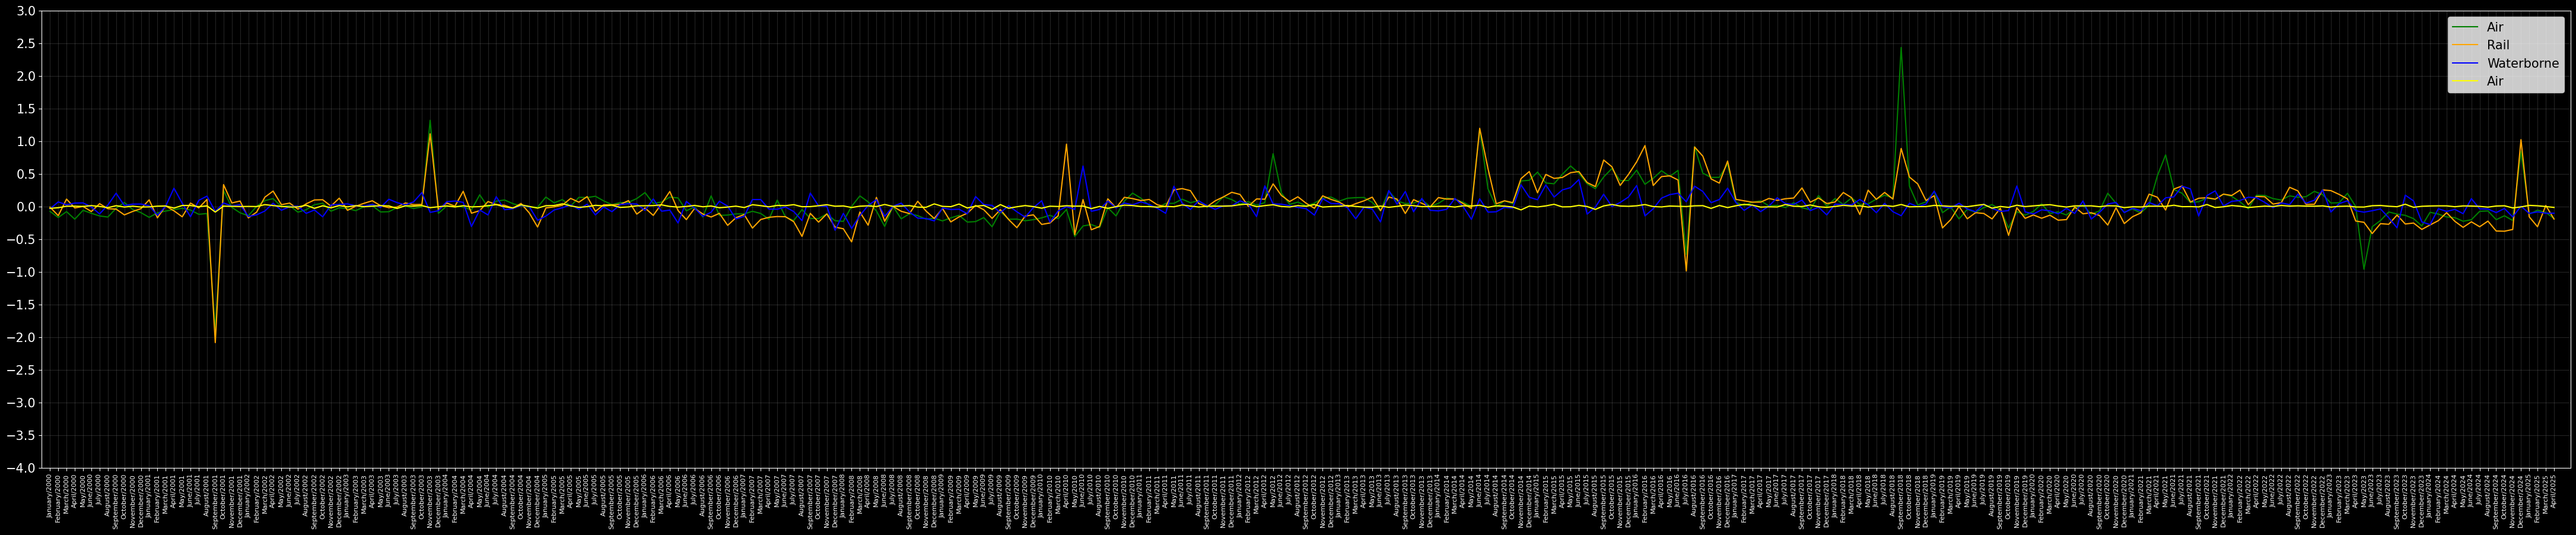

In [38]:
fig, ax = plt.subplots(figsize=(55, 10))

fig.set_facecolor('black')
ax.set_facecolor('black')

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

ax.tick_params(axis='both', colors='white')

df['Month/Year'] = pd.to_datetime(df['OBS_DATE'], format='mixed', errors='coerce').dt.strftime('%B/%Y')

y_air = df.groupby('Month/Year')['AIR_GROWTH'].sum()
y_rail = df.groupby('Month/Year')['RAIL_GROWTH'].sum()
y_water_born = df.groupby('Month/Year')['WATERBORNE_GROWTH'].sum()
y_truck = df.groupby('Month/Year')['TRUCK_GROWTH'].sum()

colors = [ 'Green' , 'Blue' , 'Yellow' , 'Orange']

ax.plot(df['Month/Year'] , y_air, color='green', label='Air')
ax.plot(df['Month/Year'] , y_rail, color='orange', label='Rail')
ax.plot(df['Month/Year'] , y_water_born, color='blue', label='Waterborne')
ax.plot(df['Month/Year'] , y_truck, color='yellow', label='Air')

ax.set_xlim(-1, df['Month/Year'].shape[0] + 1)
ax.set_ylim(y_air.min()-0.5, y_air.max()+0.5)

plt.xticks(df['Month/Year'], rotation = 90, fontsize = 8)
plt.yticks([-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3], fontsize = 15)

plt.grid(True,alpha=0.2)
plt.legend(loc='upper right',fontsize = 15)
plt.show()


7. What is the seasonal trend in freight carloads — and how should a logistics company adjust capacity accordingly?

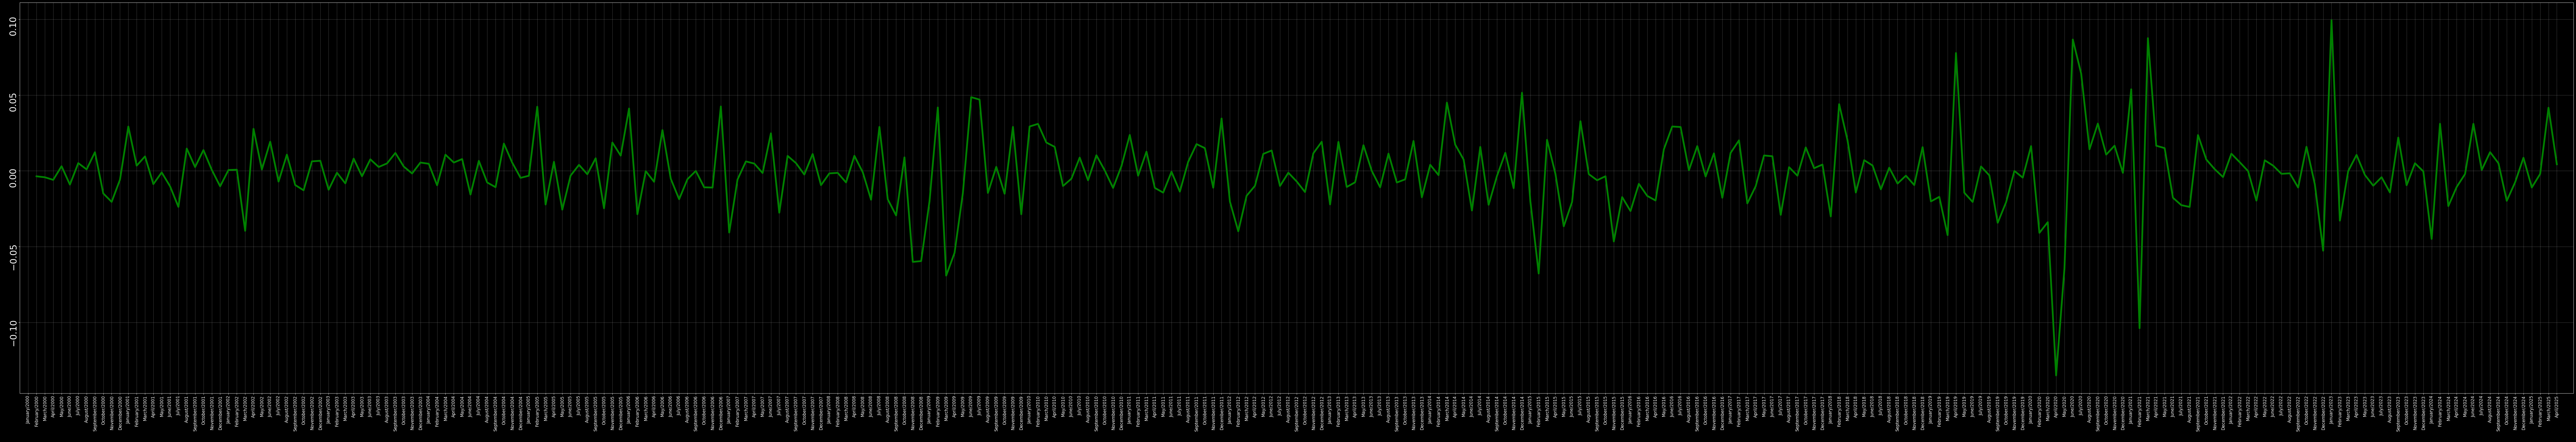

In [ ]:
# df['Year'] = pd.to_datetime(df['Month/Year']).dt.year

pct_chagne = df['RAIL_FRT_CARLOADS_D11'].pct_change(fill_method=None)

fig, ax = plt.subplots(figsize=(130, 20))

fig.set_facecolor('black')
ax.set_facecolor('black')

for spines in ax.spines.values():
    spines.set_color('white')

ax.tick_params(axis='both', colors='white',rotation=90)

ax.plot(
    df['Month/Year'],
    pct_chagne, 
    color='green',
    linewidth = 5
)


plt.yticks(fontsize = 25)
plt.xticks(df['Month/Year'], fontsize = 12)

plt.xlim(-1, df['Month/Year'].shape[0] + 1)

plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('% Change', fontsize=14)

plt.grid(True, alpha=0.4)
plt.show()

print()
print("Reduce capacity:\n")
print("Schedule maintenance, repairs, or training.\n")
print("Reallocate staff/resources to other operations like warehouse optimization.")

Strategic Action for a Logistics Company:
        ✅ 1. Plan for Volatility
        Since % changes are irregular, the company should avoid fixed yearly plans.
        Use monthly or quarterly forecasting models instead.

    ✅ 2. Use Flexible Contracts
    Use short-term leasing of railcars, third-party logistics (3PL), or on-demand capacity to match variable demand.

    ✅ 3. Prepare for Disruption Spikes
    Maintain emergency buffer capacity for sudden surges (e.g., near +10% growth).

Similarly, optimize costs during drops (near −15%) by scaling down non-essential operations.

    ✅ 4. Inventory & Warehouse Coordination
    Align warehouse intake and dispatch with high-change months to avoid congestion or underutilization.

8. Which months show spikes in intermodal rail shipments — and what could be the reason?

9. Has there been a correlation between AIR_RPM_TSI and AIR_RTMFM (Revenue Ton Miles)? What does it suggest about air cargo utilization?

10. How does the LOAD_FACTOR vary across months or years — and what does that indicate about operational efficiency?

##

## ✈️ Aviation & Air Cargo

11. How has ENPLANE_I (likely enplaned passengers or cargo) changed over time? What does this imply for fleet management?

12. During which months is air transport least utilized? Should companies reduce fleet size or reschedule maintenance in those periods?

13. Is there a relationship between AIR_RPM_TSI and ENPLANE_I? What does it tell us about flight efficiency or capacity planning?

#

## 🚆 Rail Operations

14. What are the peak and low seasons for RAIL_FRT_CARLOADS and INTERMODAL shipments? How can businesses plan warehouse or staff needs accordingly?

15. What was the impact of any specific year (e.g., COVID-19 in 2020) on RAIL_PM (rail passenger miles)?

16. Is there a trend of decreasing rail freight volume over time? Should a company diversify into road or intermodal logistics?'

#

## 📈 Trends and Forecasting

17. Can you identify a trend or pattern in the Transportation Services Index (TSI)? Is it growing, declining, or seasonal?

18. Is there a shift in preference from one transport mode to another over the years (e.g., air to rail)?

19. Can we forecast RAIL_FRT_INTERMODAL using a moving average or rolling mean? What can this forecast tell logistics firms?

#

## 🧮 Efficiency and Utilization

20. Which year had the highest average LOAD_FACTOR? How does that reflect company-wide utilization or profitability?

21. Are there inefficiencies where high ENPLANE_I values don't correlate with high AIR_RPM_TSI?

#

## 🔄 Seasonality & Business Decisions

22. Which months typically experience high freight traffic? Should companies offer discounts or allocate extra fleet in those times?

23. Is there a recurring seasonal dip across most indices (RAIL, AIR, INTERMODAL)? How should planning adapt to that?

#

## 📉 Crisis or Market Shock Analysis

24. Which transportation metrics dropped the most during 2020 (pandemic)? What was the recovery trend?

25. How resilient is each mode of transport during economic shocks? (Compare 2008, 2020, etc.)